In [227]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
from scipy import integrate
from scipy import special

In [228]:
df = np.loadtxt('data/clms.txt')

The mean of the data is  720.277975327
The maximum of the data is  227967.25
The minimum of the data is  0.01
The median of the data is  172.21
The standard deviation of the data is  3972.66375639


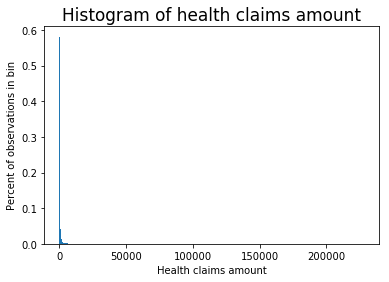

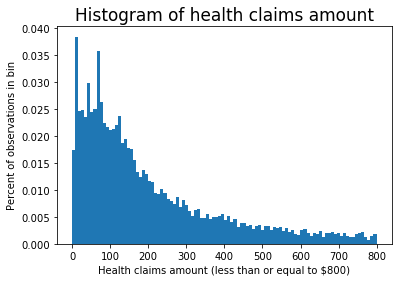

In [229]:
# summarizing the data
print("The mean of the data is ", df.mean())
print("The maximum of the data is ", df.max())
print("The minimum of the data is ", df.min())
print("The median of the data is ", np.median(df))
print("The standard deviation of the data is ", df.std())
# plotting the histogram
num_bins = 1000
weights = (1 / df.shape[0]) * np.ones_like(df)
n, bin_cuts, patches = plt.hist(df, num_bins, weights=weights)
plt.title('Histogram of health claims amount', fontsize=17)
plt.xlabel(r'Health claims amount')
plt.ylabel(r'Percent of observations in bin')
plt.show()
df_sub = df[df <= 800]
weights_sub = (1 / df.shape[0]) * np.ones_like(df_sub)
num_bins2 = 100
n, bin_cuts, patches = plt.hist(df_sub, num_bins2, weights=weights_sub)
plt.title('Histogram of health claims amount', fontsize=17)
plt.xlabel(r'Health claims amount (less than or equal to $800)')
plt.ylabel(r'Percent of observations in bin')
plt.show()

We prefer the second graph because it's more informed on the distribution where the majority of observations are located while the previous one is impacted a lot by the outliers, who have a huge amount of health claim amounts.

In [230]:
'''
def Gamma(z):
   
    f = lambda x: x**(z - 1)*np.exp(-x)
    result = integrate.quad(f, 0, np.inf)[0]
    return result
'''


def GA_dist(xvals, alpha, beta):
    '''
    ----------------------------
    GA distribution function
    ----------------------------
    '''
    pdf_vals = 1/((beta**alpha)*special.gamma(alpha))*(xvals**(alpha - 1))*np.exp(-xvals/beta)
    pdf_vals[np.isclose(pdf_vals, np.zeros_like(pdf_vals), atol = 1e-30)] = 1e-29
    return pdf_vals
def log_likelihood_GA(xvals, alpha, beta):
    pdf_vals = GA_dist(xvals, alpha, beta)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val
def crit_GA(params, args):
    alpha, beta = params
    xvals = args
    log_lik_val = log_likelihood_GA(xvals, alpha, beta)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val


In [231]:
import scipy.optimize as opt

#estimated the parameters

beta_init = (df.var())/df.mean()
alpha_init = df.mean()/beta_init
params_init = (alpha_init, beta_init)
mle_args_GA = df
bnds = ((1e-5, None), (1e-5, None))
results = opt.minimize(crit_GA, params_init, args=(mle_args_GA), method='L-BFGS-B', 
                       bounds= bnds)
alpha_GA, beta_GA = results.x
print(results)

      fun: 82076.451605664712
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.00291038,  0.09022187])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 33
      nit: 8
   status: 0
  success: True
        x: array([  2.21755310e-01,   2.19110647e+04])


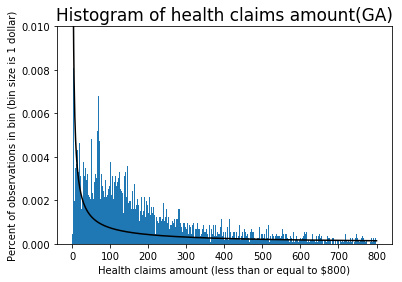

In [232]:
#plotting
clms_dist = np.linspace(1e-30, 800, 800)
pdf_dist = GA_dist(clms_dist, alpha_GA, beta_GA)
num_bins_GA = 800
n, bin_cuts, patches = plt.hist(df_sub, num_bins_GA, weights=weights_sub)
plt.plot(clms_dist, pdf_dist, "k-")
plt.title('Histogram of health claims amount(GA)', fontsize=17)
plt.xlabel(r'Health claims amount (less than or equal to $800)')
plt.ylabel(r'Percent of observations in bin (bin size is 1 dollar)')
plt.ylim(0, 0.01)
plt.show()

In [233]:
## question on estimate GG distribution
def GG_dist(xvals, alpha, beta, m):
    '''
    ----------------------------
    GA distribution function
    ----------------------------
    '''
    pdf_vals = m/((beta**alpha)*special.gamma(alpha/m))*(xvals**(alpha - 1))*np.exp(-(xvals/beta)**m)
    pdf_vals[np.isclose(pdf_vals, np.zeros_like(pdf_vals), atol = 1e-30)] = 1e-29
    return pdf_vals
def log_likelihood_GG(xvals, alpha, beta, m):
    pdf_vals = GG_dist(xvals, alpha, beta, m)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val
def crit_GG(params, args):
    alpha, beta, m = params
    xvals = args
    log_lik_val = log_likelihood_GG(xvals, alpha, beta, m)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [234]:
import scipy.optimize as opt

#estimated the parameters
alpha_init = alpha_GA
#alpha_init = 5
beta_init = beta_GA
#beta_init = 10
m_init = 1
#m_init = 5

params_init = (alpha_init, beta_init, m_init)
mle_args_GG = df
bnds = ((1e-5, None), (1e-5, None), (1e-5, None))
results = opt.minimize(crit_GG, params_init, args=(mle_args_GG), method='L-BFGS-B', 
                       bounds= bnds)
alpha_GG, beta_GG, m_GG = results.x
print(results)

      fun: 82076.44647871505
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.07566996,  0.09167707,  0.13242243])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 32
      nit: 2
   status: 0
  success: True
        x: array([  2.21753635e-01,   2.19110645e+04,   9.97723904e-01])


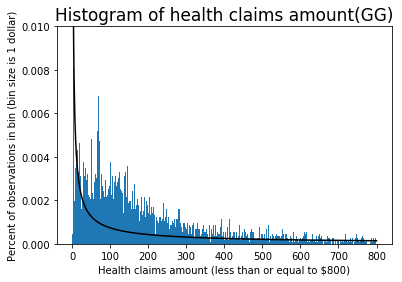

In [235]:
#plotting
clms_dist = np.linspace(1e-3, 800, 800)
pdf_dist = GG_dist(clms_dist, alpha_GG, beta_GG, m_GG)
num_bins_GG = 800
n, bin_cuts, patches = plt.hist(df_sub, num_bins_GG, weights=weights_sub)
plt.plot(clms_dist, pdf_dist, "k-")
plt.title('Histogram of health claims amount(GG)', fontsize=17)
plt.xlabel(r'Health claims amount (less than or equal to $800)')
plt.ylabel(r'Percent of observations in bin (bin size is 1 dollar)')
plt.ylim(0, 0.01)
plt.show()

In [236]:
# question on GB2
## question on estimate GG distribution
def GB2_dist(xvals, a, b, p, q):
    '''
    ----------------------------
    GB2 distribution function
    ----------------------------
    '''
    power1 = (a*p)
    #power1[np.isclose(power1, np.zeros_like(power1), atol = 1e-30)] = 1e-29
    if np.isclose(power1, 0, atol = 1e-30):
        power1 = 1e-29
    
    power2 = a
    #power2[np.isclose(power2, np.zeros_like(power2), atol = 1e-30)] = 1e-29
    if np.isclose(power2, 0, atol = 1e-30):
        power2 = 1e-29
    
    
    power3 = (p + q)
    #power3[np.isclose(power3, np.zeros_like(power3), atol = 1e-30)] = 1e-29
    if np.isclose(power3, 0, atol = 1e-30):
        power3 = 1e-29
    
    power4 = (a*p - 1)
    #power4[np.isclose(power4, np.zeros_like(power4), atol = 1e-30)] = 1e-29
    if np.isclose(power4, 0, atol = 1e-30):
        power4 = 1e-29
    
    
    
    
    denom = (b**power1*special.beta(p, q)*(1 + (xvals/b)**power2)**power3)
    denom[np.isclose(denom, np.zeros_like(denom), atol = 1e-30)] = 1e-29
    
    pdf_vals = (a*xvals**power4)/denom
    pdf_vals[np.isclose(pdf_vals, np.zeros_like(pdf_vals), atol = 1e-30)] = 1e-29
    return pdf_vals
def log_likelihood_GB2(xvals, a, b, p, q):
    pdf_vals = GB2_dist(xvals, a, b, p, q)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val
def crit_GB2(params, args):
    a, b, p, q = params
    xvals = args
    log_lik_val = log_likelihood_GB2(xvals, a, b, p, q)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val

In [244]:
import scipy.optimize as opt

#estimated the parameters
q_init = 6000
a_init = m_GG
#a_init = 5
b_init = q_init**(1/m_GG)*beta_GG
#b_init = 10
p_init = alpha_GG/m_GG
#p_init = 5


params_init = (a_init, b_init, p_init, q_init)
mle_args_GG = df
bnds = ((1e-5, None), (1e-5, None), (1e-5, None), (1e-5, None))
results = opt.minimize(crit_GB2, params_init, args=(mle_args_GG), method='L-BFGS-B', 
                       bounds= bnds)
a_GB2, b_GB2, p_GB2, q_GB2 = results.x
print(results)

      fun: 76357.019670132548
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-11.89764589,   0.        ,  -0.77707227,  -5.7683792 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 135
      nit: 13
   status: 0
  success: True
        x: array([  6.79527591e-01,   1.34101545e+08,   1.06930811e+00,
         6.00048316e+03])


Since we are starting from the converged version from (b), we didn't escape from the previous fit... however, if we try something different....


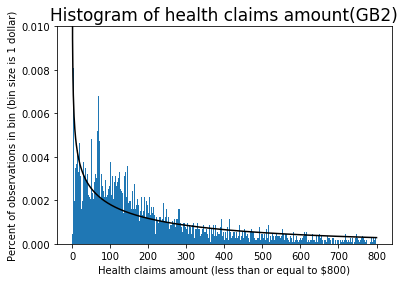

In [248]:
#plotting
clms_dist = np.linspace(1e-3, 800, 800)
pdf_dist = GB2_dist(clms_dist, a_GB2, b_GB2, p_GB2, q_GB2)
num_bins_GG = 800
n, bin_cuts, patches = plt.hist(df_sub, num_bins_GG, weights=weights_sub)
plt.plot(clms_dist, pdf_dist, "k-")
plt.title('Histogram of health claims amount(GB2)', fontsize=17)
plt.xlabel(r'Health claims amount (less than or equal to $800)')
plt.ylabel(r'Percent of observations in bin (bin size is 1 dollar)')
plt.ylim(0, 0.01)
plt.show()

In [247]:
# Likelihood ratio test
# (b) with (d)
log_lik_h0 = log_likelihood_GA(df, alpha_GA, beta_GA)
log_lik_h1 = log_likelihood_GB2(df, a_GB2, b_GB2, p_GB2, q_GB2)
LR_val = 2 * (log_lik_h1 - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

# (b) with (d)
log_lik_h0 = log_likelihood_GG(df, alpha_GG, beta_GG, m_GG)
log_lik_h1 = log_likelihood_GB2(df, a_GB2, b_GB2, p_GB2, q_GB2)
LR_val = 2 * (log_lik_h1 - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  0.0
chi squared of H0 with 2 degrees of freedom p-value =  0.0


In [ ]:
%reset